Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Be

Epoch 1/5


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1599/1599 [==============================] - 1023s 584ms/step - loss: 0.2754 - accuracy: 0.9298 - val_loss: 0.2726 - val_accuracy: 0.9287
Epoch 2/5
1599/1599 [==============================] - 936s 585ms/step - loss: 0.2729 - accuracy: 0.9301 - val_loss: 0.3675 - val_accuracy: 0.9287
Epoch 3/5
1599/1599 [==============================] - 927s 580ms/step - loss: 0.2799 - accuracy: 0.9301 - val_loss: 0.2630 - val_accuracy: 0.9287
Epoch 4/5
1599/1599 [==============================] - 926s 579ms/step - loss: 0.2760 - accuracy: 0.9301 - val_loss: 0.2697 - val_accuracy: 0.9287
Epoch 5/5
1599/1599 [==============================] - 925s 578ms/step - loss: 0.2740 - accuracy: 0.9301 - val_loss: 0.2704 - val_accuracy: 0.9287
Training history: {'loss': [0.27540701627731323, 0.2729063630104065, 0.27993887662887573, 0.27599263191223145, 0.2739967703819275], 'accuracy': [0.9298369288444519, 0.9301497936248779, 0.9301497936248779, 0.9301106929779053, 0.9301497936248779], 'val_loss': [0.2725711166858

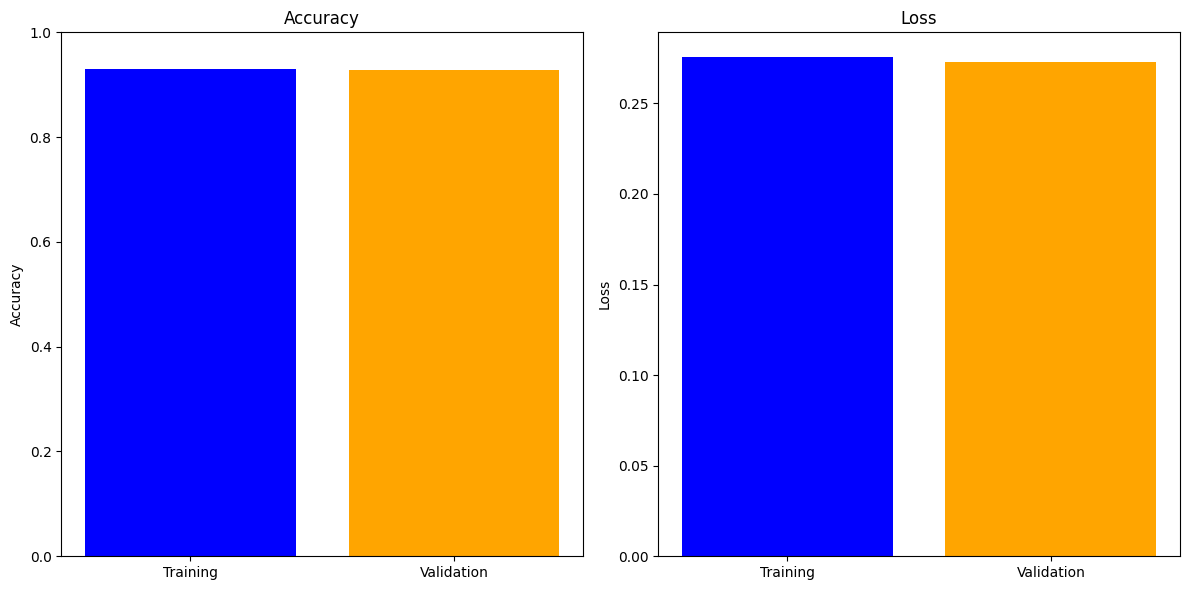

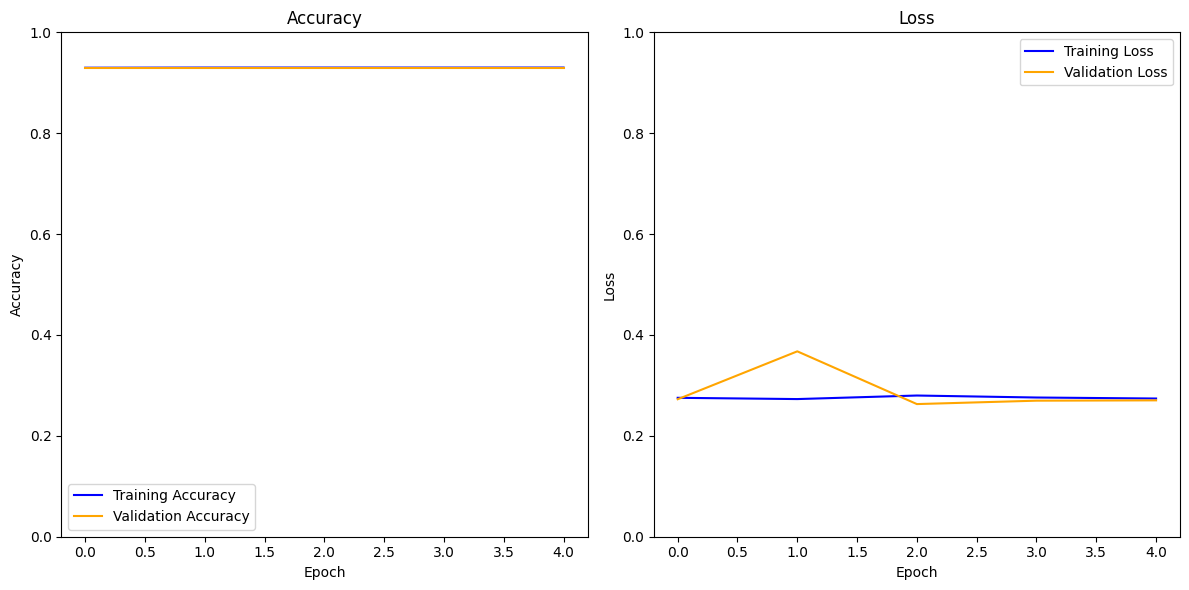

400/400 [==============================] - 74s 186ms/step - loss: 0.2704 - accuracy: 0.9287


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary libraries
!pip install transformers

# Import necessary libraries
import tensorflow as tf
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset_path = '/content/drive/MyDrive/sentiment.csv'  # Adjust the path as needed
sentiment = pd.read_csv(dataset_path)

# Preprocess the dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(sentiment['tweet'], sentiment['label'], test_size=0.2, random_state=42)

# Load pre-trained XLNet model and tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = TFXLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)

# Tokenize and encode the text data
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128)

# Convert labels to tensors
train_labels = tf.convert_to_tensor(train_labels.tolist())
test_labels = tf.convert_to_tensor(test_labels.tolist())

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))

# Fine-tune XLNet model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_dataset.shuffle(1000).batch(16), epochs=5, batch_size=16, validation_data=test_dataset.shuffle(1000).batch(16))

# Print the history
print("Training history:", history.history)

# Plot bar graphs of accuracy, validation accuracy, loss, and validation loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values (bar graph)
plt.subplot(1, 2, 1)
plt.bar(['Training', 'Validation'], [history.history['accuracy'][0], history.history['val_accuracy'][0]], color=['blue', 'orange'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Plot training & validation loss values (bar graph)
plt.subplot(1, 2, 2)
plt.bar(['Training', 'Validation'], [history.history['loss'][0], history.history['val_loss'][0]], color=['blue', 'orange'])
plt.title('Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Plot training & validation accuracy values (line graph)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

# Plot training & validation loss values (line graph)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
model.evaluate(test_dataset.batch(16))

# Save the model to Google Drive
model.save_pretrained('/content/drive/MyDrive/models/sentiment_classification_xlnet_model')
